<a href="https://colab.research.google.com/github/AleX5andr/ICH_Final_project/blob/main/notebooks/01_data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries


In [ ]:
import datetime

import pandas as pd
import numpy as np
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

import pickle

import warnings

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

# Variables

In [ ]:
non = "unknown"

level_mapping = {
    "A1": [
        "A1", "А1", "а1", "А1 сертиф, но по факту А2",
        "A1-A2", "А1-А2", "А1–А2", "А1-А2", "а1-а2",
        "немецкий - а1-а2", "а1-а2 , ая свободный", "учит A2",
        "Учиться на B1", "Учиться на B1 во вторую смену",
        "Учиться до сентября на B1", "Учится на B1", "учиться на b1",
        "B1 в процессе обучения", "B1 В ПРОЦЕССЕ", "В ПРОЦЕССЕ B1",
        "ИДЕТ НА A1", "УЧИТ A1", "НАЧИНАЮЩИЙ", "идет на А1", "ая в1",
        ("курс А2-В1 - сдача в июле, но вечерняя смена инт курсов, настроен "
        "получить гутшайн уже сейчас."), "Проходит сейчас B1",
        ("Учиться на B1 во вторую смену, в первую хочет получить одобрение "
        "на обучение у нас"), "немецкий - а1-а2, англ b1-b2",
        "разговорный из украины, без сертификата",
        "точно уровень не знаю, но говорить могу - учила сама"
    ],
    "A2": [
        "A2", "А2", "а2", "a2", "А2+", "A2+", "B1 (ЖДЕТ СЕРТ)",
        "А2 ( Б1 в июне)", "А2 ( скоро екзамен)", "А2 (весной - еще 300 часов В1)",
        "А2(Б1 в марте экз)", "А2 ( хочет просить совмещать)", "А2(ждет итоги Б1)",
        "А2 ( в процессе Б1)", "А2 ( Б2 в процессе)", "А2 (сдает B1 - 12 дек)",
        "А2 (заканчив В1 в июне)", "А2 нем -В2 англ", "А2, в процессе Б1",
        "А2 ( повтор на Б1)", "А2( включили нем в ангебот)", "а2-в1", "А2-Б1",
        "А2( ждет итоги Б!)", "A2 (идет на В1)", "A2-B1", "А2-В1", "a2-б1",
        "Пока А2", "A2 (УЧИТ B1)", "ПРОХОДИТ A2", "A2 (Б1 в июне)",
        "A2 (идет доучивать В1 - 300 часов; предположительно до августа)",
        "сдавала А2", "сдавала A2", "a2 (b1 экзамен 15 июня)",
        "a2 (сдавала экз В1, но не сдала похоже)", "b1 (ждет результаты)",
        "b1 экзамен", "b1 экзамен 26 января", "b1 экзамен 12 апреля",
        "b1 экзамен будет", "b1 экзамен в феврале", "b1 экзамен 24 февраля",
        "b1 24 февраля экзамен", "b1 (b2 экзамен 6 февраля)",
        "b1 (b2 экзамен 2 марта)", "b1 результат экзамена", "Б1?",
        "повторно B1", "повторно b1", "B1 будет в феврале", "будет B1 в июне",
        "Ждет результат по B1", "ждет результат по B1", "Ждет результаты по B1",
        "Б1 ( ждет итог )", "B1 (ждет результат)", "Ждет B1",
        "Ждет B1 со дня на день", "b1 ждет результаты", "B1 (ждет результаты)",
        "b1 (ждет результат)", "B1 (почти, не сдала чуть)", "f2",
        "B1 (ждет результаты В2)", "B1 (ждет результат Б2)",
        "A2-B1", "А2-Б1", "A2→B1", "B1 ЭКЗАМЕН", "B1 (до февраля)", "A2–B1",
        "B1 (ЖДЕТ СЕРТ)", "ПОЧТИ B1", "A2-B1", "А2-Б1", "A2→B1", "A2–B1",
        "B1 будет в феврале 2025", "Ждем B1 со дня на день",
        ("Гражданка Германии уже год в Германии Учит немецкий и в сентябре b1 "
        "через гос-во проходит, а не через ДЖЦ, вечером учится 3 р в неделю "
        "с 18 до 21"), "В1 в сентябре", "ждем B1", "B1 еще нет результата",
        ("ЯЗ: нем В1 был экз 03.05 повтор и сейчас ждет результаты. "
        "Технический англ был. А1 сейчас. ОБР: 2 во информационные и комп "
        "сети - инженер системоте"), "Ждем B1", "Пока А2, сдает 17 05 B1",
        "окончание 13.06 курса на b1", "b1 экзамен будет 12 апреля",
        "b1 9ждет экзамен)", "Ждем результат по B1", "Ждет со дня на день В1",
        "А2 (В1 с 3 раза не сдала, бератер видела наши доки)", "а2, англ B1",
        "ждет сертификат B1", "b1 ждет серт на днях на руки",
        "b1 24 февраля экзамен, англ b2", "б1 (ждет рез-тат)",
        "Б1( может будет)", "b1 ждет экзамен в феврале", "А2 ( Б1 март )",
        "Без 5 минут B1 (ждет результаты экзамена)", "а2 (б1 в сер января)",
        "Ждет результат по B1 в феврале", "Проходит сейчас повторно B1",
        "Сдала экзамен на B1, ждет в начале февраля результат",
        "В январе будут результаты по экзамену на B1",
        "B1 (почти, не сдала чуть) + англ В1", "в1 ждем результаты",
        "а2 (сдавала экз В1, но не сдала похоже)", "ня а2, ая в1",
        "не учила ( разговорный) сразу пошла работать", "А2-В1 учит",
        "в1, еще нет сертификата", "ждет результаты по B1 экзамену",
        "b1 результат экзамена в феврале", "б1 заканчивает", "В1?",
        "b1 будет в январе экзамен, готов совмещать",
        "B1 вроде был (18 лет назад сдавал)",
        "А2 (сдает B1 - 12 дек) - не сдал!", "сдавала А2 в сентябре",
        "b1 должна получить результаты в феврале"
    ],
    "B1": [
        "B1", "b1", "Б1", "б1", "В1", "в1", "B1+", "b1+", "b1 (B2 ждет серт)",
        "B1 (УЧИТ B2)", "B1-B2", "Б1-Б2", "В1-В2", "б10б2", "в1, идет на в2",
        "B1–B2", "Б1-Б2", "B1 → B2", "В1-В2", "в1-в2", "Сам оценивает на B2",
        "B1 (учится на В2 до авг.)", "B1 (учится на В2 уже)",
        "В1, может уже В2", "В1? может уже В2?", "б1-б2", "б1 (до июля на В2)",
        "b2-c2", "B1 немецкий", "B1 (УЧИТ B2)", "ПОЧТИ B1",
        "В1 (учится на В2 до няоб 24)", "B1 вроде был", "Б10Б2",
        "B2 (ждет итог экзамена)", "B1 (B2 должна до конца февраля получить)",
        "B2+ (не сдавал, но говорит)", "B2 (говорит без проблем - давно здесь)",
        "13 лет живет в Германии", "25 лет живет в Германии", "в1-ня , в1-ая",
        "Гражданка Германии", "Бй", "b1 (b2 ждет серт)", "Б1 (учит Б2)",
        "Сам оценивает на B2, 13 лет живет в Германии", "Б1 ( ждет Б2)",
        "lэкзамен - 6 июля на В1. курсы вечером (но уверенно говорит на B1)",
        "ГРАЖДАНИН", "ГРАЖДАНКА", "гражданка", "гражданин", "Гражданин",
        "b1 (b2 в июле экзамен)", "B1, сдает B2 в апреле", "НЯ - В1, АЯ - В1",
        "b1 (b2 15 марта экзамен)", "Б1 ( ждет итог Б2)", "Б1 ( проходит Б2)",
        "В1, может уже В2?", "B1 есть, ждем B2 в конце месяца", "b1-b2",
        "Сдавал 8 12 на B1 - ждет результат. 3 01 - аплейт - получил B1!",
        "Б1 ( проходит Б2 )", "Б1 ( был екзамен ждет итог )",
        "b1 (учила, но не сдала В2)", "b2 (ждет серт)", "b2 ждет серт",
        "в1 , хочет совмещать с в2", "в1 , экзамен на в2 15 декабря",
        "B1 (B2 экзамен в январе)", "5 июля 2024 сдает экз на В2",
        "B1 немецкий и английский Advance", "b1 (b2 не сдал экзамен)",
        "В1 (учится на В2 до авг.", "В2 - не сдал", "b1 (ждет серт)",
        "В1, учится на В2 до няоб 24", "Б1 ( ждет результат Б2)",
        "В1 (учится на В2 уже)", "В январе - В2 сдает"
    ],
    "B2": [
        "B2", "b2", "Б2", "б2", "В2", "в2", "B2+", "B2 (С1 ЭКЗАМЕН)",
        "в1 (уже сдала В2)", "B2-C1", "B2–C1", "B2 (УЧИТ C1)", "б2+",
        "C1 (ЖДЕТ СЕРТ)", "В2-С1", "в2-с1", "B2-C2", "B2–C2", "B2 (ЭКЗАМЕН C1)",
        "Б2-С1", "B2–C1", "в2-с1", "B2-C2", "B2–C2", "Б2 ( учит С1)",
        "Б2( 16.02 экзамен С1)", "b2 (с1 экзамен 16 февраля)", "b2-c1",
        "б2 (с1 ждет рез-тат)"
    ],
    "C1": [
        "C1", "С1", "с1", "C1-C2", "C1–C2", "С1 -ая , Ня -а1"
    ],
    "C2": [
        "C2", "С2", "с2"
    ],
    "None": [
        "-", "–", "НЕТ", "Нет", "NONE", "ни одной", "НИКАКОЙ", "никакой",
        "?", "0", ".", "90", "УТОЧНИТЬ", "УТОЧНИТЬ!", "АДРЕС", "БЕЗ",
        "НЕ УЧИЛ", "не учил", "НУЛЕВОЙ", "нулевой уровень", "А0",
        "ТОЛЬКО ПОШЕЛ НА КУРСЫ", "ПЛАНИРУЕТ УЧИТЬ", "не учила ( разговорный)",
        "разговорный из украины", "разговорный", "не сдавал, но гражданин",
        "A0", "a0", "a0-a1", "A0-A1", "C", "A", "В", "ничего",
        "Detmold", "Paulinenstraße", "Thorn-Prikker-Str", "Paderborn",
        "Lichtenfelser Straße", "Untersiemau", "Hagen", "живёт в Германии",
        "Нет сертификатов", "нет сертификатов", "точно уровень не знаю",
        "а0", "Detmold, Paulinenstraße 95, 32756", "учит немецкий",
        "Thorn-Prikker-Str. 30, Hagen, 58093", "0", "90",
        "Paderborn 33102, Schwabenweg 10", "31.05.2024",
        "нулевой уровень, только пошел на курсы.",
         "Lichtenfelser Straße 25, Untersiemau 96253",
        ("Нет сертификатов, но есть С1 англ, неоконченное высшее в ИТ "
        "(и еще одно высшее юридическое) , очень хочет в ИТ, сильно "
        "замотивирована именно н"), "ня-0, но англ B2+", "ня-0, ая-B1"
    ]
}

# Functions

In [ ]:
from pandas.io import json
def SLA_to_seconds(x: str) -> int:
    """
    Converts an SLA value to total seconds

    :param x: The SLA value to convert.
              Accepts either a datetime.time or datetime.timedelta object.
    :return: Total number of seconds if input is valid, otherwise None.
    """
    if isinstance(x, datetime.time):
        return x.hour * 3600 + x.minute * 60 + x.second
    elif isinstance(x, datetime.timedelta):
        return x.total_seconds()
    return None


def convert_to_float(x: str) -> str:
    """
    Converts a string representing a monetary value into a float

    :param x: Input value that may contain currency symbols (€/$), spaces, or
                localized decimal separators
    :return: The numeric value as a float if conversion succeeds, otherwise None
    """
    if pd.isna(x):
        return None
    elif isinstance(x, (int, float)):
        return float(x)
    try:
        x = (x.replace("€", "").replace("$", "").replace(" ", "")
            .replace(".", "").replace(",", "."))
        return float(x)
    except Exception:
        return None


def map_german_level(text: str):
    """
    Maps text to normalized German level (A1–C2 or None) using level_mapping

    :param text: Raw text containing information about the German language
                    proficiency level
    :return: Normalized German level (A1, A2, B1, B2, C1, C2) or None if
                    no match is found
    """
    if pd.isna(text):
        return None
    val = str(text).upper().replace("А", "A").replace("В", "B").replace("С", "C")
    for level, patterns in level_mapping.items():
        for p in patterns:
            if p in val:
                return None if level == "None" else level
    return None


def mode_ignore_nan(m):
    """
    Returns the most frequent (mode) non-null value in a pandas Series

    :param m: The pandas Series to process. Can contain NaN or missing values
    :return: The most frequent value in the Series if available, otherwise pd.NA
    """
    m = m.dropna()
    return m.mode().iloc[0] if not m.empty else pd.NA


def add_cats(df, cat_values):
    """
    Ensures that the provided categorical columns include all given categories.
    :param df: Subset of a DataFrame
    :param cat_values: Single value or list of category names to ensure exist
    :return: Updated DataFrame slice
    """
    if not isinstance(cat_values, list):
        cat_values = [cat_values]
    for col in df.columns:
        s = df[col]
        if s.dtype.name == 'category':
            missing = [v for v in cat_values if v not in s.cat.categories]
            if missing:
                s = s.cat.add_categories(missing)
            df.loc[:, col] = s.astype("category")
    return df


def get_city_info(city, city_data: json) -> pd.Series:
    """
    Retrieves geographic and administrative information for a given city
    from the global dictionary `city_data`

    :param city: The city name to look up in the `city_data` dictionary
    :param city_data: Dictionary containing city information with keys
                      such as longitude, latitude, country, federal_state,
                      and city
    :return: A pandas Series containing:
             - longitude: Geographic longitude of the city
             - latitude: Geographic latitude of the city
             - country: Country where the city is located
             - federal_state: Federal state or administrative region
             - city: English name of the city
    """
    if (city == 'unknown' or isinstance(city, (pd.Series, list, dict))
                                                             or pd.isna(city)):
        return pd.Series({
            'Longitude': 'unknown',
            'Latitude': 'unknown',
            'Country': 'unknown',
            'State': 'unknown',
            'City': 'unknown'
        })
    else:
        info = city_data.get(str(city), {})
        return pd.Series({
            'Longitude': info.get('longitude'),
            'Latitude': info.get('latitude'),
            'Country': info.get('country'),
            'State': info.get('state'),
            'City': info.get('city')
        })

#Loading data

In [ ]:
calls = (
    "https://docs.google.com/spreadsheets/d/1R0RGTCA13llyrsSnbEHNsJZqYhELlz8q/"
    "edit?usp=sharing&ouid=101122644310264117380&rtpof=true&sd=true"
)
contacts = (
    "https://docs.google.com/spreadsheets/d/1yBklBNwMNmmxxdGR11QcqxuH4QX82vNo/"
    "edit?usp=sharing&ouid=101122644310264117380&rtpof=true&sd=true"
)
deals = (
    "https://docs.google.com/spreadsheets/d/1hGoe5yHfmBKZ_XRd_7jTbTQ1vflT7R1G/"
    "edit?usp=sharing&ouid=101122644310264117380&rtpof=true&sd=true"
)
spend = (
    "https://docs.google.com/spreadsheets/d/1ZNU4Ll0fkDf_BOqn44SXvrUod8Y-eMjM/"
    "edit?usp=sharing&ouid=101122644310264117380&rtpof=true&sd=true"
)
files = {
    "calls": calls,
    "contacts": contacts,
    "deals": deals,
    "spend": spend
}

In [ ]:
dfs = {}
for name, url in files.items():
    try:
        url = url.split("/d/")[1].split("/")[0]
        url = f"https://drive.google.com/uc?export=download&id={url}"
        dfs[name] = pd.read_excel(url, dtype={"Id": "string",
                            "CONTACTID": "string", "Contact Name": "string"})
        globals()[name] = dfs[name]
        print(f"'{name.capitalize()}' loaded.")
    except Exception as e:
        print(f"Error uploading file '{name.capitalize()}': {e}")

'Calls' loaded.
'Contacts' loaded.
'Deals' loaded.
'Spend' loaded.


# Removing unnecessary columns and rows with errors

In [ ]:
calls.drop(columns=["Dialled Number", "Tag"], inplace=True)
deals = deals[deals["Education Type"] != "#REF!"].copy()

# Obtaining data for data analysis

In [ ]:
display(deals['Level of Deutsch'].unique()[:10])

array([nan, 'в1', 'A2', 'б1', 'b1', 'B1', 'в1-в2', 'B2', 'C2', 'с1'],
      dtype=object)

# Setting data types

## Data types in Calls

In [ ]:
display(calls.head(3))
display(calls.info())

,Id,Call Start Time,Call Owner Name,CONTACTID,Call Type,Call Duration (in seconds),Call Status,Outgoing Call Status,Scheduled in CRM
0,5805028000000805001,30.06.2023 08:43,John Doe,<NA>,Inbound,171.0,Received,NaN,NaN
1,5805028000000768006,30.06.2023 08:46,John Doe,<NA>,Outbound,28.0,Attended Dialled,Completed,0.0
2,5805028000000764027,30.06.2023 08:59,John Doe,<NA>,Outbound,24.0,Attended Dialled,Completed,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95874 entries, 0 to 95873
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Id                          95874 non-null  string 
 1   Call Start Time             95874 non-null  object 
 2   Call Owner Name             95874 non-null  object 
 3   CONTACTID                   91941 non-null  string 
 4   Call Type                   95874 non-null  object 
 5   Call Duration (in seconds)  95791 non-null  float64
 6   Call Status                 95874 non-null  object 
 7   Outgoing Call Status        86875 non-null  object 
 8   Scheduled in CRM            86875 non-null  float64
dtypes: float64(2), object(5), string(2)
memory usage: 6.6+ MB


None

In [ ]:
calls["Call Start Time"] = pd.to_datetime(calls["Call Start Time"], dayfirst=True)
calls["Call Owner Name"] = calls["Call Owner Name"].astype("category")
calls["Call Type"] = calls["Call Type"].astype("category")
calls["Call Status"] = calls["Call Status"].astype("category")
calls["Outgoing Call Status"] = calls["Outgoing Call Status"].astype("category")
calls["Scheduled in CRM"] = calls["Scheduled in CRM"].astype(bool)
display(calls.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95874 entries, 0 to 95873
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Id                          95874 non-null  string        
 1   Call Start Time             95874 non-null  datetime64[ns]
 2   Call Owner Name             95874 non-null  category      
 3   CONTACTID                   91941 non-null  string        
 4   Call Type                   95874 non-null  category      
 5   Call Duration (in seconds)  95791 non-null  float64       
 6   Call Status                 95874 non-null  category      
 7   Outgoing Call Status        86875 non-null  category      
 8   Scheduled in CRM            95874 non-null  bool          
dtypes: bool(1), category(4), datetime64[ns](1), float64(1), string(2)
memory usage: 3.4 MB


None

## Data types in Contacts

In [ ]:
display(contacts.head(3))
display(contacts.info())

,Id,Contact Owner Name,Created Time,Modified Time
0,5805028000000645014,Rachel White,27.06.2023 11:28,22.12.2023 13:34
1,5805028000000872003,Charlie Davis,03.07.2023 11:31,21.05.2024 10:23
2,5805028000000889001,Bob Brown,02.07.2023 22:37,21.12.2023 13:17


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18548 entries, 0 to 18547
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  18548 non-null  string
 1   Contact Owner Name  18548 non-null  object
 2   Created Time        18548 non-null  object
 3   Modified Time       18548 non-null  object
dtypes: object(3), string(1)
memory usage: 579.8+ KB


None

In [ ]:
contacts['Contact Owner Name'] = contacts['Contact Owner Name'].astype("category")
contacts['Created Time'] = pd.to_datetime(contacts['Created Time'],
                                          dayfirst=True)
contacts['Modified Time'] = pd.to_datetime(contacts['Modified Time'],
                                           dayfirst=True)
display(contacts.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18548 entries, 0 to 18547
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Id                  18548 non-null  string        
 1   Contact Owner Name  18548 non-null  category      
 2   Created Time        18548 non-null  datetime64[ns]
 3   Modified Time       18548 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](2), string(1)
memory usage: 454.2 KB


None

## Data types in Deals

In [ ]:
display(deals.head(3))
display(deals.info())

,Id,Deal Owner Name,Closing Date,Quality,Stage,Lost Reason,Page,Campaign,SLA,Content,Term,Source,Payment Type,Product,Education Type,Created Time,Course duration,Months of study,Initial Amount Paid,Offer Total Amount,Contact Name,City,Level of Deutsch
0,5805028000056864695,Ben Hall,NaN,NaN,New Lead,NaN,/eng/test,03.07.23women,NaN,v16,women,Facebook Ads,NaN,NaN,NaN,21.06.2024 15:30,NaN,NaN,NaN,NaN,5805028000056849495,NaN,NaN
1,5805028000056859489,Ulysses Adams,NaN,NaN,New Lead,NaN,/at-eng,NaN,NaN,NaN,NaN,Organic,NaN,Web Developer,Morning,21.06.2024 15:23,6.0,NaN,0,2000,5805028000056834471,NaN,NaN
2,5805028000056832357,Ulysses Adams,21.06.2024,D - Non Target,Lost,Non target,/at-eng,engwien_AT,00:26:43,b1-at,21_06_2024,Telegram posts,NaN,NaN,NaN,21.06.2024 14:45,NaN,NaN,NaN,NaN,5805028000056854421,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
Index: 21594 entries, 0 to 21593
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   21593 non-null  string 
 1   Deal Owner Name      21564 non-null  object 
 2   Closing Date         14645 non-null  object 
 3   Quality              19340 non-null  object 
 4   Stage                21593 non-null  object 
 5   Lost Reason          16124 non-null  object 
 6   Page                 21593 non-null  object 
 7   Campaign             16067 non-null  object 
 8   SLA                  15533 non-null  object 
 9   Content              14147 non-null  object 
 10  Term                 12454 non-null  object 
 11  Source               21593 non-null  object 
 12  Payment Type         496 non-null    object 
 13  Product              3592 non-null   object 
 14  Education Type       3299 non-null   object 
 15  Created Time         21593 non-null  obje

None

In [ ]:
deals["Deal Owner Name"] = deals["Deal Owner Name"].astype("category")
deals["Closing Date"] = pd.to_datetime(deals["Closing Date"],
                                                dayfirst=True, errors="coerce")
deals["Page"] = deals["Page"].astype("string")
deals["Campaign"] = deals["Campaign"].astype("string")
deals["SLA"] = deals["SLA"].apply(SLA_to_seconds).astype("float64")
deals["Created Time"] = pd.to_datetime(deals["Created Time"],
                                                dayfirst=True, errors="coerce")
deals['Initial Amount Paid'] = (deals['Initial Amount Paid']
                                .apply(convert_to_float))
deals['Offer Total Amount'] = (deals['Offer Total Amount']
                                .apply(convert_to_float))
deals["Level of Deutsch"] = (deals["Level of Deutsch"].astype(str)
                                .apply(map_german_level))
deals = deals.astype({col: "category" for col in
                            deals.select_dtypes(include=["object"]).columns})
display(deals.info())

<class 'pandas.core.frame.DataFrame'>
Index: 21594 entries, 0 to 21593
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Id                   21593 non-null  string        
 1   Deal Owner Name      21564 non-null  category      
 2   Closing Date         14645 non-null  datetime64[ns]
 3   Quality              19340 non-null  category      
 4   Stage                21593 non-null  category      
 5   Lost Reason          16124 non-null  category      
 6   Page                 21593 non-null  string        
 7   Campaign             16067 non-null  string        
 8   SLA                  15533 non-null  float64       
 9   Content              14147 non-null  category      
 10  Term                 12454 non-null  category      
 11  Source               21593 non-null  category      
 12  Payment Type         496 non-null    category      
 13  Product              3592 non-null  

None

## Data types in Spend

In [ ]:
display(spend.head(3))
display(spend.info())

,Date,Source,Campaign,Impressions,Spend,Clicks,AdGroup,Ad
0,2023-07-03,Google Ads,gen_analyst_DE,6,0.00,0,NaN,NaN
1,2023-07-03,Google Ads,performancemax_eng_DE,4,0.01,1,NaN,NaN
2,2023-07-03,Facebook Ads,NaN,0,0.00,0,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20779 entries, 0 to 20778
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         20779 non-null  datetime64[ns]
 1   Source       20779 non-null  object        
 2   Campaign     14785 non-null  object        
 3   Impressions  20779 non-null  int64         
 4   Spend        20779 non-null  float64       
 5   Clicks       20779 non-null  int64         
 6   AdGroup      13951 non-null  object        
 7   Ad           13951 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 1.3+ MB


None

In [ ]:
spend = spend.astype({col: "category" for col in
                            spend.select_dtypes(include=["object"]).columns})
display(spend.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20779 entries, 0 to 20778
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         20779 non-null  datetime64[ns]
 1   Source       20779 non-null  category      
 2   Campaign     14785 non-null  category      
 3   Impressions  20779 non-null  int64         
 4   Spend        20779 non-null  float64       
 5   Clicks       20779 non-null  int64         
 6   AdGroup      13951 non-null  category      
 7   Ad           13951 non-null  category      
dtypes: category(4), datetime64[ns](1), float64(1), int64(2)
memory usage: 760.2 KB


None

# Cleaning data

## Cleaning data in Calls

In [ ]:
display(calls.head())
display(calls.describe().T)

,Id,Call Start Time,Call Owner Name,CONTACTID,Call Type,Call Duration (in seconds),Call Status,Outgoing Call Status,Scheduled in CRM
0,5805028000000805001,2023-06-30 08:43:00,John Doe,<NA>,Inbound,171.0,Received,NaN,True
1,5805028000000768006,2023-06-30 08:46:00,John Doe,<NA>,Outbound,28.0,Attended Dialled,Completed,False
2,5805028000000764027,2023-06-30 08:59:00,John Doe,<NA>,Outbound,24.0,Attended Dialled,Completed,False
3,5805028000000787003,2023-06-30 09:20:00,John Doe,5805028000000645014,Outbound,6.0,Attended Dialled,Completed,False
4,5805028000000768019,2023-06-30 09:30:00,John Doe,5805028000000645014,Outbound,11.0,Attended Dialled,Completed,False


,count,mean,min,25%,50%,75%,max,std
Call Start Time,95874,2024-02-05 12:34:44.369484800,2023-06-30 08:43:00,2023-11-24 11:07:30,2024-02-19 12:19:30,2024-04-22 19:10:00,2024-06-21 15:31:00,NaN
Call Duration (in seconds),95791.0,164.977263,0.0,4.0,8.0,98.0,7625.0,401.410826


### Processing outliers in column "Call Duration (in seconds)"

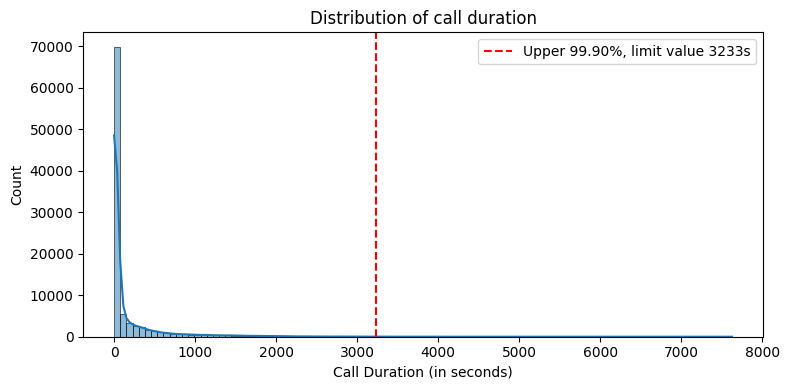

Emissions found and processed: 96


In [ ]:
col = "Call Duration (in seconds)"
limit = 0.999
upper = calls[col].quantile(limit)

plt.figure(figsize=(8, 4))
sns.histplot(calls[col], bins=100, kde=True)
plt.axvline(upper, color="red", linestyle="--", label=(
                    f"Upper {limit * 100:.2f}%, limit value {upper:.0f}s"))
plt.legend()
plt.title("Distribution of call duration")
plt.tight_layout()
plt.show()
print(f"Emissions found and processed: {len(calls[(calls[col]> upper)])}")

calls.loc[calls[col] > upper, col] = upper

### Remove and Adjust Overlapping Calls

In [ ]:
calls["Call End Time"] = (calls['Call Start Time'] +
            pd.to_timedelta(calls['Call Duration (in seconds)'], unit='s'))
calls = (calls.sort_values(['Call Owner Name', 'Call Start Time'])
                                                        .reset_index(drop=True))
calls['Prev End Time'] = (calls.groupby('Call Owner Name', observed=False)
                                                    ['Call End Time'].shift(1))

# Delete call records where the start and end of the current call are less
# than the end of the previous call
total_removed = 0
while True:
    mask_remove = ((calls['Call Start Time'] < calls['Prev End Time']) &
                    (calls['Call End Time'] <= calls['Prev End Time']))
    sum_remove = mask_remove.sum()
    if sum_remove == 0:
        calls['Prev End Time'] = (calls.groupby('Call Owner Name',
                                    observed=False)['Call End Time'].shift(1))
        break
    total_removed += sum_remove
    calls = calls[~mask_remove].copy()
    calls['Prev End Time'] = (calls.groupby('Call Owner Name', observed=False)
                                                    ['Call End Time'].shift(1))
print(f"{total_removed} call records with incorrect data have been deleted")

# Correction of call records where the beginning of the current call is less
# than the end of the previous call
mask_fix = calls['Call Start Time'] < calls['Prev End Time']
total_fix = mask_fix.sum()
calls.loc[mask_fix, 'Call Start Time'] = (calls.loc[mask_fix,
                                                            'Prev End Time'])
print(f"{total_fix} call records corrected")

calls = calls.drop(columns=['Prev End Time'])

5191 call records with incorrect data have been deleted
4202 call records corrected


## Cleaning data in Deals

### Deleting test data

In [ ]:
deals = deals[deals["Source"] != "Test"].copy()

In [ ]:
display(deals.head(3))
display(deals.select_dtypes(include=["float", "int"]).describe().T)

,Id,Deal Owner Name,Closing Date,Quality,Stage,Lost Reason,Page,Campaign,SLA,Content,Term,Source,Payment Type,Product,Education Type,Created Time,Course duration,Months of study,Initial Amount Paid,Offer Total Amount,Contact Name,City,Level of Deutsch
0,5805028000056864695,Ben Hall,NaT,NaN,New Lead,NaN,/eng/test,03.07.23women,NaN,v16,women,Facebook Ads,NaN,NaN,NaN,2024-06-21 15:30:00,NaN,NaN,NaN,NaN,5805028000056849495,NaN,NaN
1,5805028000056859489,Ulysses Adams,NaT,NaN,New Lead,NaN,/at-eng,<NA>,NaN,NaN,NaN,Organic,NaN,Web Developer,Morning,2024-06-21 15:23:00,6.0,NaN,0.0,2000.0,5805028000056834471,NaN,NaN
2,5805028000056832357,Ulysses Adams,2024-06-21,D - Non Target,Lost,Non target,/at-eng,engwien_AT,1603.0,b1-at,21_06_2024,Telegram posts,NaN,NaN,NaN,2024-06-21 14:45:00,NaN,NaN,NaN,NaN,5805028000056854421,NaN,NaN


,count,mean,std,min,25%,50%,75%,max
SLA,15392.0,115748.762149,738614.056302,3.0,4338.0,19689.5,56063.75,26908464.0
Course duration,3567.0,10.196804,1.836247,6.0,11.0,11.0,11.00,11.0
Months of study,837.0,5.446834,2.922623,0.0,3.0,5.0,8.00,11.0
Initial Amount Paid,4145.0,945.213993,1408.319517,0.0,300.0,1000.0,1000.00,11500.0
Offer Total Amount,4165.0,7113.736134,4639.343213,0.0,3000.0,11000.0,11000.00,11500.0


### Processing outliers in column "SLA"

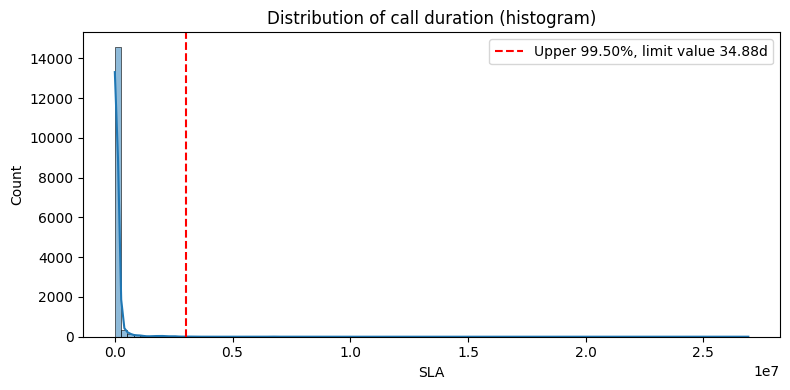

Emissions found and processed: 77


In [ ]:
col = "SLA"
limit = 0.995
upper = deals[col].quantile(limit)
upper_days = upper / 3600 / 24

plt.figure(figsize=(8, 4))
sns.histplot(deals[col], bins=100, kde=True)
plt.axvline(upper, color="red", linestyle="--", label=(
                    f"Upper {limit * 100:.2f}%, limit value {upper_days:.2f}d"))
plt.legend()
plt.title("Distribution of call duration (histogram)")
plt.tight_layout()
plt.show()
print(f"Emissions found and processed: {len(deals[(deals[col]> upper)])}")

deals.loc[deals[col] > upper, col] = upper

### Correcting errors in dates

In [ ]:
mask = deals['Closing Date'] < deals['Created Time'].dt.date
print(f"Found {mask.sum()} records where Closing Date < Created Time")
deals.loc[mask, ['Created Time', 'Closing Date']] = (
    deals.loc[mask, ['Closing Date', 'Created Time']].values
)
mask_new = deals['Closing Date'] < deals['Created Time'].dt.date
print(f"Date errors corrected in {mask.sum() - mask_new.sum()} line")

Found 44 records where Closing Date < Created Time
Date errors corrected in 44 line


# Filling in the data

Analysis of the number of products und payment methods per contact

In [ ]:
deals_counts = deals.groupby('Contact Name', as_index=False).agg({
                                'Product': 'count', 'Payment Type': 'count'})
deals_prod = deals_counts['Product'].value_counts().sort_index().reset_index()
deals_prod.columns = ['Products per Contact', 'Number of Contacts']
display(deals_prod)
print()
deals_payment = deals_counts['Payment Type'].value_counts().sort_index().reset_index()
deals_payment.columns = ['Payment Types per Contact', 'Number of Contacts']
display(deals_payment)

,Products per Contact,Number of Contacts
0,0,14476
1,1,3415
2,2,62
3,3,1
4,4,1


,Payment Types per Contact,Number of Contacts
0,0,17474
1,1,474
2,2,6
3,4,1


## Filling in customer data from Deals to Contacts

In [ ]:
deals['City'] = deals['City'].str.strip().str.title()
deals_mode = (
    deals.groupby('Contact Name', as_index=False)
    .agg({
        'Level of Deutsch': mode_ignore_nan,
        'City': mode_ignore_nan
    })
)
contacts = contacts.merge(
    deals_mode,
    how='left',
    left_on='Id',
    right_on='Contact Name'
).drop(columns=['Contact Name'])
contacts['City'] = contacts['City'].astype('category')
contacts['Level of Deutsch'] = contacts['Level of Deutsch'].astype('category')

In [ ]:
deals = deals.drop(columns=['City', 'Level of Deutsch'])

## Replacing empty strings

In [ ]:
# Contacts
contacts[['Level of Deutsch', 'City']] = (add_cats(contacts
                                        [['Level of Deutsch', 'City']], non))
contacts['Level of Deutsch'] = contacts['Level of Deutsch'].fillna(non)
contacts['City'] = contacts['City'].fillna(non)
contacts['City'] = contacts['City'].cat.remove_categories(['-'])
# Calls
calls[['CONTACTID']] = add_cats(calls[['CONTACTID']], non)
calls[['Outgoing Call Status']] = (add_cats(calls[['Outgoing Call Status']],
                                           ['Missed', 'Completed']))
calls['CONTACTID'] = calls['CONTACTID'].fillna(non)
calls.loc[calls['Call Type'] == 'Missed', 'Outgoing Call Status'] = 'Missed'
calls.loc[calls['Call Status'] == 'Received', 'Outgoing Call Status'] = (
                                                                'Completed')
# Deals
deals[['Deal Owner Name']] = add_cats(deals[['Deal Owner Name']], non)
deals['Deal Owner Name'] = deals['Deal Owner Name'].fillna(non)
# Spend
spend[['Campaign', 'AdGroup', 'Ad']] = (add_cats(spend[['Campaign', 'AdGroup',
                                                                'Ad']], non))
for col in ['Campaign', 'AdGroup', 'Ad']:
    spend[col] = spend[col].fillna(non)

## Adding information by city

In [ ]:
url = ("https://drive.google.com/file/d/1lRGXvIPD3tCdKCa_1dH7XmIFagHRJmQF/"
                                                            "view?usp=sharing")
url = url.split("/d/")[1].split("/")[0]
url = f"https://drive.google.com/uc?export=download&id={url}"
city_data = pd.read_json(url)

In [ ]:
contacts[['Longitude', 'Latitude', 'Country', 'State', 'City']] = (
    contacts['City'].astype(str).apply(lambda c: get_city_info(c, city_data)))
contacts[['Longitude', 'Latitude', 'Country', 'State', 'City']] = (
    contacts[['Longitude', 'Latitude', 'Country', 'State', 'City']]
    .fillna(non).astype('category'))

# Removing duplicates

## Removing duplicates in Calls

In [ ]:
print(f"{calls.duplicated(subset=calls.columns[1:]).sum()} duplicate "
                                                            "entries removed")
calls = calls.drop_duplicates(subset=calls.columns[1:], keep='last')

2025 duplicate entries removed


## Removing duplicates in Deals

In [ ]:
dup_sum = deals[deals["Lost Reason"] == "Duplicate"].shape[0]
deals = deals[deals["Lost Reason"] != "Duplicate"].copy()
dup_sum += deals.duplicated(subset=deals.columns[1:]).sum()
deals.drop_duplicates(subset=deals.columns[1:], keep='last')
print(f"{dup_sum} duplicate entries removed")

1773 duplicate entries removed


## Removing duplicates in Spend

In [ ]:
print(f"{spend.duplicated().sum()} duplicate entries removed")
spend = spend.drop_duplicates()

917 duplicate entries removed


# Saving cleared data

In [ ]:
files = {
    "calls": calls,
    "contacts": contacts,
    "deals": deals,
    "spend": spend
}

with open("cleaned datasets.pkl", "wb") as f:
    pickle.dump(files, f)

# Descriptive statistics

## Statistics for Calls data

In [ ]:
display(calls.select_dtypes(include=[np.number]).describe().T)

,count,mean,std,min,25%,50%,75%,max
Call Duration (in seconds),88579.0,177.035536,407.878659,0.0,4.0,10.0,121.0,3233.31


### Statistics: Call Duration

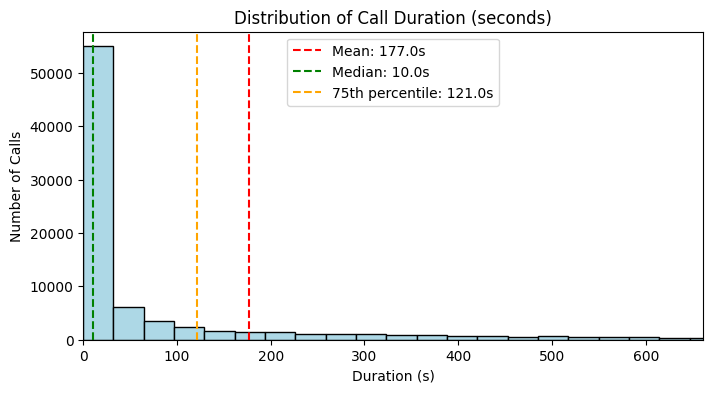

In [ ]:
col = calls['Call Duration (in seconds)']

plt.figure(figsize=(8,4))
plt.hist(col, bins=100, color='lightblue', edgecolor='black')
plt.title('Distribution of Call Duration (seconds)')
plt.xlabel('Duration (s)')
plt.ylabel('Number of Calls')
mean_val = col.mean()
median_val = col.median()
q75_val = col.quantile(0.75)
q90_val = col.quantile(0.9)
plt.axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.1f}s')
plt.axvline(median_val, color='green', linestyle='--', label=f'Median: {median_val:.1f}s')
plt.axvline(q75_val, color='orange', linestyle='--', label=f'75th percentile: {q75_val:.1f}s')
plt.legend(loc='upper center')
plt.xlim(0, q90_val * 1.2)
plt.show()

Very large right skewness of the data
* the mean (177 seconds) is much greater than the median (10 seconds)
* 75% of all calls last up to 2 minutes,
but there are a small number of very long calls

### Statistics: Call Status

In [ ]:
counts = calls['Call Status'].value_counts()
percent = (calls['Call Status'].value_counts(normalize=True) * 100).round(2)
percent = percent.astype(str) + '%'
call_status = pd.concat([counts, percent], axis=1).T
call_status.index = ['Count', 'Percentage']
call_status

Call Status,Attended Dialled,Unattended Dialled,Missed,Received,Overdue,Cancelled,Scheduled Attended Delay,Scheduled Unattended Delay,Scheduled Attended,Scheduled Unattended,Scheduled
Count,67139,13725,4610,3052,57,19,17,17,14,5,3
Percentage,75.73%,15.48%,5.2%,3.44%,0.06%,0.02%,0.02%,0.02%,0.02%,0.01%,0.0%


*   оver 91% of all calls are outgoing (Attended (75.73%) + Unattended (15.48%))
*   the percentage of missed calls (5.2%) is within acceptable limits, but there is still potential for improvement
*   there are virtually no scheduled or canceled calls, indicating that only actual actions are clearly recorded

## Statistics for Deals data

In [ ]:
display(deals.select_dtypes(include=[np.number]).describe().T)

,count,mean,std,min,25%,50%,75%,max
SLA,14857.0,84284.826896,297442.976947,3.0,4358.0,19603.0,55752.0,3013541.16
Course duration,3513.0,10.195844,1.837137,6.0,11.0,11.0,11.0,11.00
Months of study,835.0,5.449102,2.920733,0.0,3.0,5.0,8.0,11.00
Initial Amount Paid,4040.0,952.254950,1401.438844,0.0,300.0,1000.0,1000.0,11500.00
Offer Total Amount,4060.0,7194.756158,4601.508292,0.0,3500.0,11000.0,11000.0,11500.00


### Statistics: SLA

In [ ]:
sla_desc = (deals['SLA']
            .describe(percentiles=[.5, .95, .99])
            .to_frame(name='SLA')
            .T)
print("Descriptive statistics for SLA (seconds):")
display(sla_desc)

mean_val = deals['SLA'].mean()
median_val = deals['SLA'].median()
print(f"\nMean SLA: {mean_val:.2f} sec")
print(f"Median SLA: {median_val:.2f} sec")
if mean_val > median_val * 1.5:
    print("Skewed to the right (long tail, with outliers)")
elif median_val > mean_val * 1.5:
    print("Skewed to the left")
else:
    print("The distribution is relatively symmetrical")

sla_hr = deals['SLA'] / 3600
bins = [-1, 1, 24, 24*7, np.inf]
labels = ['<1 hour', '1–24 hours', '1–7 days', '>7 days']
sla_groups = pd.cut(sla_hr, bins=bins, labels=labels)
sla_bins = (sla_groups.value_counts(normalize=True)
                         .mul(100)
                         .round(2)
                         .reindex(labels))
sla_bins = sla_bins.astype(str) + '%'
sla_bins = sla_bins.to_frame().T
print("\nDistribution by SLA business groups (%):")
display(sla_bins)

Descriptive statistics for SLA (seconds):


,count,mean,std,min,50%,95%,99%,max
SLA,14857.0,84284.826896,297442.976947,3.0,19603.0,270389.0,1818076.96,3013541.16



Mean SLA: 84284.83 sec
Median SLA: 19603.00 sec
Skewed to the right (long tail, with outliers)

Distribution by SLA business groups (%):


SLA,<1 hour,1–24 hours,1–7 days,>7 days
proportion,22.38%,65.86%,9.19%,2.56%


The analysis shows that the majority of SLAs complete within 1–24 hours (≈66%), with another 22% completing in less than an hour. Only about 12% of cases require more than a day, and 2.5% take more than a week.

The mean is significantly higher than the median (23.4 hours versus 5.4 hours), indicating a strong right-skewed distribution
and the presence of a few, but extremely long, SLA records (outliers).

### Statistics: Prepayment assessment

In [ ]:
valid = deals[deals['Offer Total Amount'] > 0].copy()
valid['deposit_ratio'] = (valid['Initial Amount Paid'] /
                                                    valid['Offer Total Amount'])
conditions = [
    valid['Initial Amount Paid'] == 0,
    (valid['deposit_ratio'] > 0) & (valid['deposit_ratio'] < 0.25),
    (valid['deposit_ratio'] >= 0.25) & (valid['deposit_ratio'] < 0.5),
    valid['deposit_ratio'] >= 0.5
]
labels = ['No prepayment', '<25%', '25–50%', '>50%']
valid['payment_group'] = np.select(conditions, labels, default='Not defined')
payment_share = (valid['payment_group'].value_counts(normalize=True)
                                            .mul(100).round(2).reindex(labels))
payment_share_df = payment_share.to_frame(name='Share')
payment_share_df['Share'] = payment_share_df['Share'].astype(str) + '%'
print("Distribution of clients by prepayment share:")
display(payment_share_df)

Distribution of clients by prepayment share:


,Share
payment_group,
No prepayment,1.22%
<25%,90.82%
25–50%,0.4%
>50%,7.13%


Most clients (approximately 91%) make an advance payment of less than 25% of the total tuition fee, indicating the popularity of minimum down payments.

About 7% of clients pay more than half the tuition upfront, and 1.2% begin their training without any advance payment.

### Statistics: Stage

In [ ]:
stage_stats = pd.DataFrame({
    'Count': deals['Stage'].value_counts(),
    'Percentage': deals['Stage'].value_counts(normalize=True).mul(100).round(2)
}).reset_index().rename(columns={'index': 'Stage'})
stage_stats['Percentage'] = stage_stats['Percentage'].astype(str) + '%'
print("Descriptive statistics — Stage:")
display(stage_stats)

Descriptive statistics — Stage:


,Stage,Count,Percentage
0,Lost,13919,70.78%
1,Call Delayed,2170,11.03%
2,Registered on Webinar,2070,10.53%
3,Payment Done,853,4.34%
4,Waiting For Payment,323,1.64%
5,Qualificated,128,0.65%
6,Registered on Offline Day,85,0.43%
7,Need to Call - Sales,32,0.16%
8,Need To Call,31,0.16%
9,Test Sent,25,0.13%


The majority of deals (approximately 71%) have a "Lost" status, indicating a high level of losses during the sales phase.
About 21% of deals are in intermediate stages (Call Delayed, Registered on Webinar) and only 4.3% reach the "Payment Done" status—that is, actual payment.

This indicates a low conversion rate to payment and the need to analyze at which stages customers most often drop off.

### Statistics: Quality

Descriptive statistics — Quality:


,Quality,Count,Percentage
0,E - Non Qualified,6110,35.05%
1,D - Non Target,5979,34.3%
2,C - Low,3389,19.44%
3,B - Medium,1536,8.81%
4,A - High,416,2.39%
5,F,0,0.0%


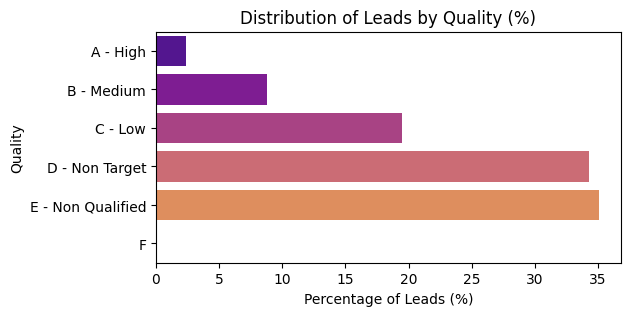

In [ ]:
quality_stats = pd.DataFrame({
    'Count': deals['Quality'].value_counts(),
    'Percentage': (deals['Quality'].value_counts(normalize=True)
                                                            .mul(100).round(2))
}).reset_index().rename(columns={'index': 'Quality'})
plt.figure(figsize=(6, 3))
sns.barplot(data=quality_stats, y='Quality', x='Percentage', palette='plasma')
plt.title("Distribution of Leads by Quality (%)")
plt.xlabel("Percentage of Leads (%)")
plt.ylabel("Quality")
quality_stats['Percentage'] = quality_stats['Percentage'].astype(str) + '%'
print("Descriptive statistics — Quality:")
display(quality_stats)
plt.show()

Most leads are of low quality—categories E (Non-Qualified) (35%) and D (Non-Targeted) (34%) together account for almost 70% of the database.

Only about 11% of leads are classified as medium or high quality (B (Medium) and A (High)).

This indicates that the primary lead flow is not sufficiently targeted and that traffic sources or qualification criteria should be optimized.

## Statistics for Spend data

### Statistics by advertising sources

In [ ]:
spend_source_clicks = (spend.groupby(['Date', 'Source']).agg({'Clicks': 'sum'})
    .sort_values(['Date', 'Clicks'], ascending=[True, False]))
source_summary = (
    spend.groupby('Source', as_index=False)
    .agg(
        Total_Clicks=('Clicks', 'sum'),
        Avg_Clicks_per_Day=('Clicks', 'mean'),
        Active_Days=('Date', 'nunique')
    )
    .sort_values('Total_Clicks', ascending=False)
)
total_clicks = source_summary['Total_Clicks'].sum()
source_summary['Share'] = ((source_summary['Total_Clicks'] / total_clicks * 100)
                                                    .round(2).astype(str) + '%')
print("Summary statistics by Source:")
display(source_summary)

Summary statistics by Source:


,Source,Total_Clicks,Avg_Clicks_per_Day,Active_Days,Share
3,Google Ads,248487,196.277251,355,49.85%
5,Organic,59089,114.959144,355,11.85%
13,Youtube Ads,59061,33.105942,355,11.85%
2,Facebook Ads,48133,5.030097,355,9.66%
11,Tiktok Ads,28268,9.470017,355,5.67%
9,Telegram posts,16777,20.068182,355,3.37%
0,Bloggers,14250,22.547468,355,2.86%
8,SMM,11521,20.176883,355,2.31%
1,CRM,7995,22.521127,355,1.6%
12,Webinar,3241,4.231070,326,0.65%


The majority of clicks come from Google Ads — about 248K clicks (≈50%), making it the main acquisition channel.

Next are Organic (≈59K, 12%) and YouTube Ads (≈59K, 12%), providing a comparable contribution.

Facebook Ads (≈48K, 10%) and TikTok Ads (≈28K, 6%) form the second most significant group of sources.

The remaining channels — Telegram, Bloggers, SMM, and CRM — together account for around 17% of total clicks, while Offline and Radio have almost no impact on traffic.

Overall, nearly 70% of all clicks come from paid advertising sources (Google, YouTube, Facebook, TikTok).